In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

import matplotlib.pyplot as plt

%matplotlib inline

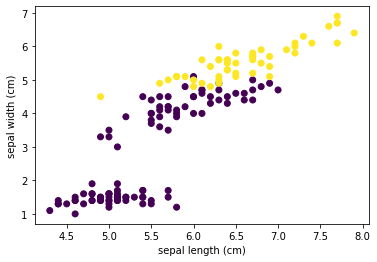

(135, 2) (135,)
[0 1 0 1 0]


In [2]:
# Load data (Iris)

iris = datasets.load_iris()

X_input = iris.data[:,[0,2]] ## We take only 2 input variables
y_target = iris.target
y_target[y_target==1] = 0 ## Turns into a binary classification problem
y_target[y_target==2] = 1 ## Turns into a binary classification problem
feature_names = iris['feature_names'][:2]

plt.scatter(X_input[:,0], X_input[:,1], c=y_target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_target, test_size=0.1, random_state=42, stratify = y_target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, y_train.shape)
print(y_train[:5])

In [16]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,) )
])

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

hist = model.fit(x=X_train, y=y_train, epochs=100, verbose = 0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(penalty = 'none')
lr.fit(X_train, y_train)

print("coef from sklearn/LogisticRegression ")
print(lr.coef_)
print(lr.intercept_)

print("")

print("coef from Keras ")
weights = model.get_weights()
print(weights[0])
print(weights[1])

coef from sklearn/LogisticRegression 
[[-3.28523637 23.06479122]]
[-13.50810775]

coef from Keras 
[[-0.75593007]
 [ 1.3843954 ]]
[-0.35683307]


In [11]:
y_pred = model.predict(X_test)

pd.set_option('display.max_columns', None)
pd.DataFrame({'pred':np.round(y_pred[:,0],3), 'real':y_test[:]}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
pred,0.434,0.702,0.547,0.405,0.58,0.397,0.177,0.52,0.643,0.471,0.407,0.603,0.093,0.554,0.452
real,0.000,1.000,1.000,0.000,1.00,0.000,0.000,0.00,1.000,0.000,0.000,1.000,0.000,0.000,0.000


In [12]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=500)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)



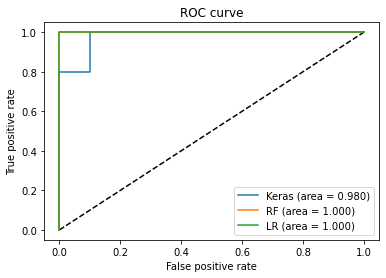

In [13]:
y_pred_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()